# Create Data Visualization for Energy Prices

https://www.esios.ree.es/es/analisis/10211?vis=1&start_date=01-01-2022T00%3A00&end_date=23-12-2022T23%3A55&compare_start_date=31-12-2021T00%3A00&groupby=day&compare_indicators=805,806,807,808,809,810,811,812,813,814,815,816,1277,10403,1286,1368

## Create list with energy prices indicators

In [3]:
compare_indicators=[805,806,807,808,809,810,811,812,813,814,815,816,1277,10403,1286,1368]

## Generate the data with the `esios` library

> You may need to change the `esios` library because it's made for p48 generation, not energy prices.

### Get the `JSON` for one energy price

In [4]:
import esios

In [5]:
data = esios.get_indicator_data(805)

### Process the `DataFrame`

In [8]:
df = esios.dataframe_p48(data)

### Create an empty list

In [38]:
list_df = []

### Process the data for all indicators

In [39]:
for indicator in compare_indicators:
    try:
        data = esios.get_indicator_data(indicator, start_date='2022-01-01', end_date='2022-12-31')
        df = esios.dataframe_p48(data)

        list_df.append(df)
    except:
        print(f'The indicator {indicator} could not be downloaded')

### Concat all the `DataFrame`s within the list

In [40]:
import pandas as pd

In [41]:
df_prices = pd.concat(list_df, axis=1)

In [42]:
df_prices

Mercado Diario  Restricciones PBF  \
datetime_utc                                                   
2021-12-31 23:00:00+00:00          145.86               9.49   
2022-01-01 00:00:00+00:00          114.90              11.00   
...                                   ...                ...   
2022-12-23 21:00:00+00:00           42.81               0.00   
2022-12-23 22:00:00+00:00           20.00               0.00   

                           Restricciones TR  \
datetime_utc                                  
2021-12-31 23:00:00+00:00              1.32   
2022-01-01 00:00:00+00:00              1.69   
...                                     ...   
2022-12-23 21:00:00+00:00              0.00   
2022-12-23 22:00:00+00:00              0.00   

                           Mercado intradiario (subastas MIBEL y continuo)  \
datetime_utc                                                                 
2021-12-31 23:00:00+00:00                                            -0.26   
2022-01-01 00:00:00+00:00                                             0.00   
...                                                                    ...   
2022-12-23 21:00:00+00:00                                             0.00   
2022-12-23 22:00:00+00:00                                             0.00   

                           Restricciones Intradiario  \
datetime_utc                                           
2021-12-31 23:00:00+00:00                        0.0   
2022-01-01 00:00:00+00:00                        0.0   
...                                              ...   
2022-12-23 21:00:00+00:00                        0.0   
2022-12-23 22:00:00+00:00                        0.0   

                           Reserva Potencia Adicional Subir  Banda Secundaria  \
datetime_utc                                                                    
2021-12-31 23:00:00+00:00                               0.0              1.91   
2022-01-01 00:00:00+00:00                               0.0              3.97   
...                                                     ...               ...   
2022-12-23 21:00:00+00:00                               0.0              0.00   
2022-12-23 22:00:00+00:00                               0.0              0.00   

                           Desvíos Medidos  Saldo Desvíos  \
datetime_utc                                                
2021-12-31 23:00:00+00:00             2.12          -1.50   
2022-01-01 00:00:00+00:00             1.98          -0.94   
...                                    ...            ...   
2022-12-23 21:00:00+00:00             0.00           0.00   
2022-12-23 22:00:00+00:00             0.00           0.00   

                           Pagos por capacidad  Saldo P.O.14.6  \
datetime_utc                                                     
2021-12-31 23:00:00+00:00                  0.0           -0.02   
2022-01-01 00:00:00+00:00                  0.0           -0.58   
...                                        ...             ...   
2022-12-23 21:00:00+00:00                  0.0            0.00   
2022-12-23 22:00:00+00:00                  0.0            0.00   

                           Fallo nominación UPG  \
datetime_utc                                      
2021-12-31 23:00:00+00:00                   0.0   
2022-01-01 00:00:00+00:00                   0.0   
...                                         ...   
2022-12-23 21:00:00+00:00                   0.0   
2022-12-23 22:00:00+00:00                   0.0   

                           Servicio de interrumpibilidad  \
datetime_utc                                               
2021-12-31 23:00:00+00:00                            0.0   
2022-01-01 00:00:00+00:00                            0.0   
...                                                  ...   
2022-12-23 21:00:00+00:00                            0.0   
2022-12-23 22:00:00+00:00                            0.0   

                           Mecanismo de ajuste RD-L 10/2022  \
datetim

## Compute the daily pricing

In [43]:
df_prices_daily = df_prices.resample(rule='1D').mean()

## Melt the daily energy prices `DataFrame`

In [44]:
dfres = df_prices_daily.melt(ignore_index=False).reset_index()

## Visualize the data

### Bar plot

#### Colors

In [45]:
import plotly.express as px

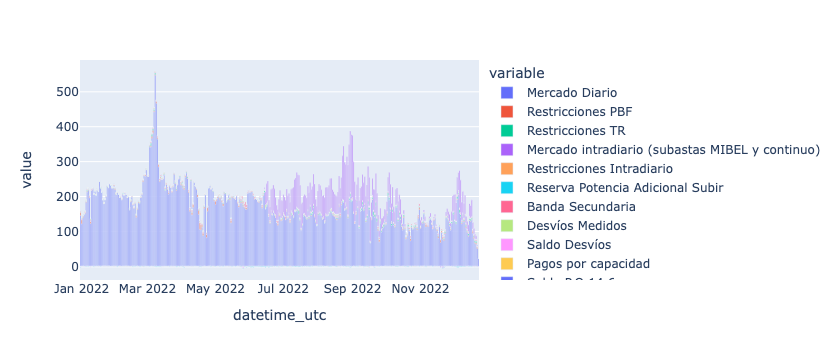

In [46]:
px.bar(data_frame=dfres, x='datetime_utc', y='value', color='variable')

#### Facets

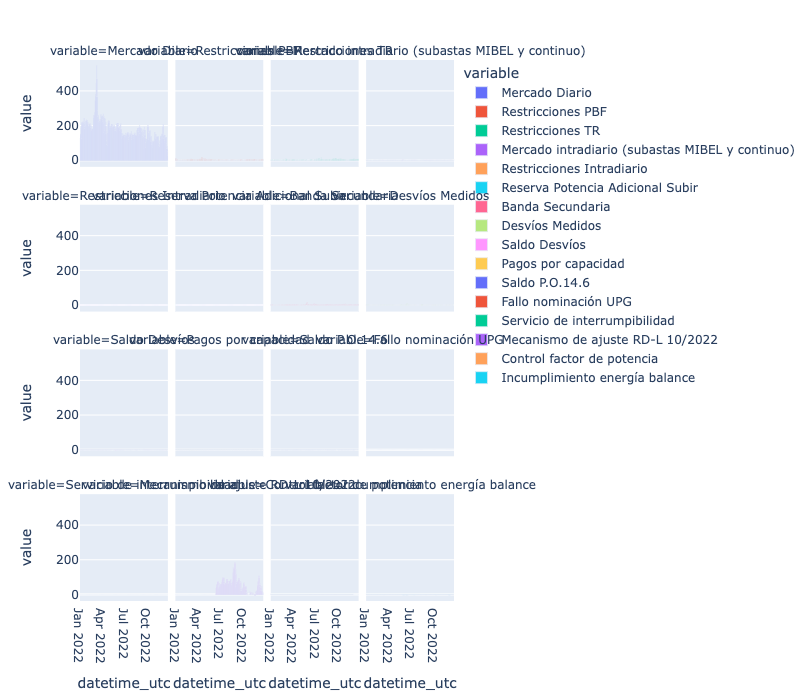

In [47]:
px.bar(data_frame=dfres, x='datetime_utc', y='value',
       color='variable', facet_col='variable', facet_col_wrap=4, height=700)

### Area plot

#### Colors

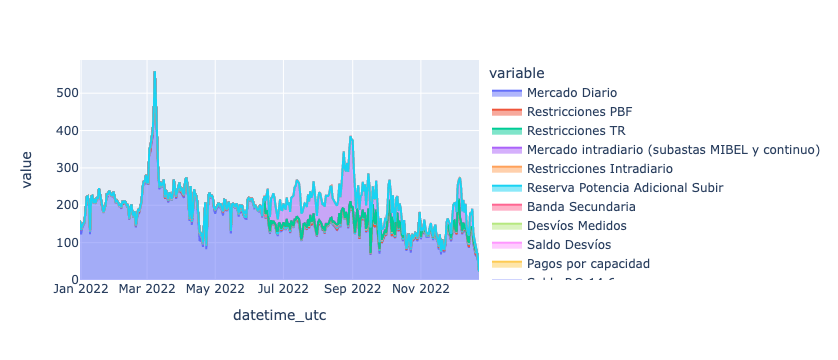

In [48]:
px.area(data_frame=dfres, x='datetime_utc', y='value', color='variable')

#### Facets

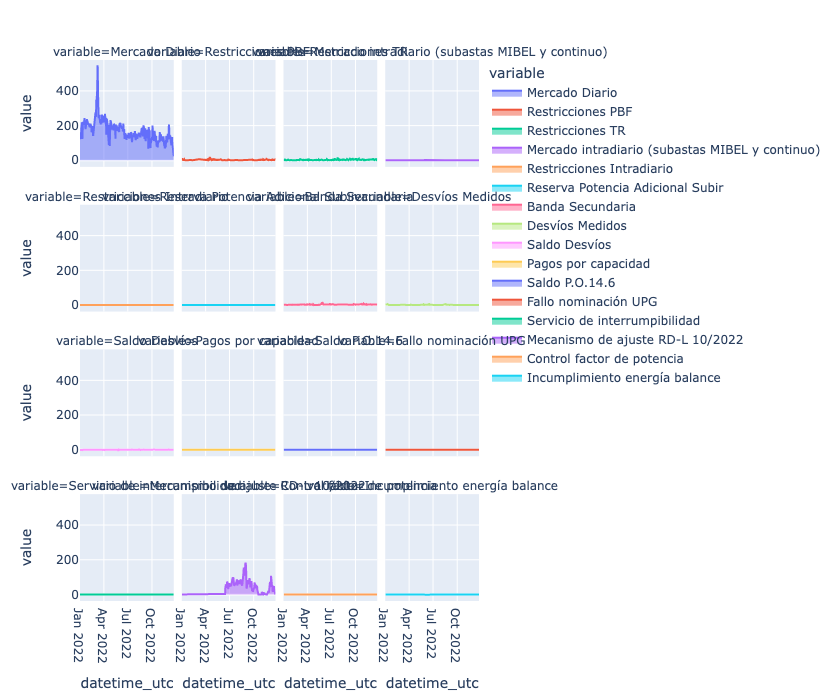

In [49]:
px.area(data_frame=dfres, x='datetime_utc', y='value',
       color='variable', facet_col='variable', facet_col_wrap=4, height=700)

### Line plot

#### Colors

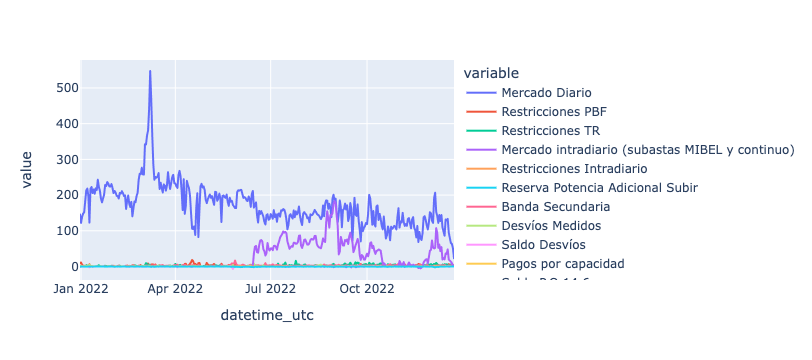

In [50]:
px.line(data_frame=dfres, x='datetime_utc', y='value', color='variable')

#### Facets

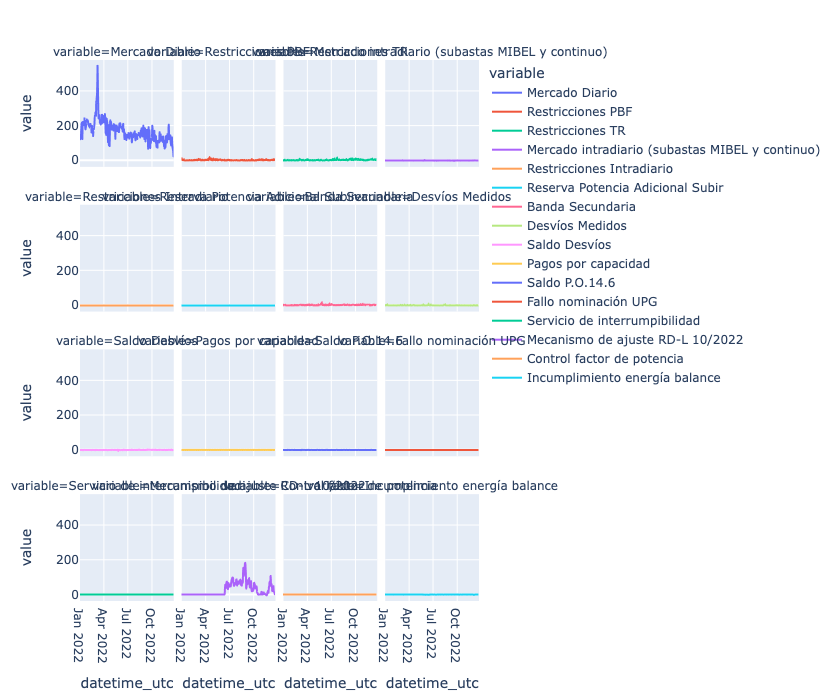

In [51]:
px.line(data_frame=dfres, x='datetime_utc', y='value',
       color='variable', facet_col='variable', facet_col_wrap=4, height=700)